In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard
6.	'Parch':  parents/children aboard
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models.

The test set should be used to see how well your model performs on unseen data.







### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [43]:
train_data = pd.read_csv("/content/drive/MyDrive/CSE303_lab/CSE303 Fall24/plotting basic/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/CSE303_lab/CSE303 Fall24/plotting basic/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/CSE303_lab/CSE303 Fall24/plotting basic/gender_submission.csv")

In [44]:
print('Train Data:')
print(train_data.head())

print('Test Data:')
print(test_data.head())

print('Gender Data:')
print(gender_data.head())

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [45]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
#Show all column names
print(df. columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [48]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [49]:
# Count rows and coulums
row = len(df.axes[0])
column = len(df.axes[1])
print("Number of Rows: ", row)
print("Number of Columns: ", column)

Number of Rows:  1309
Number of Columns:  12


In [50]:
# Total cells in the dataset
print(row*column)

15708


#### Visualisation of missing data


<Axes: >

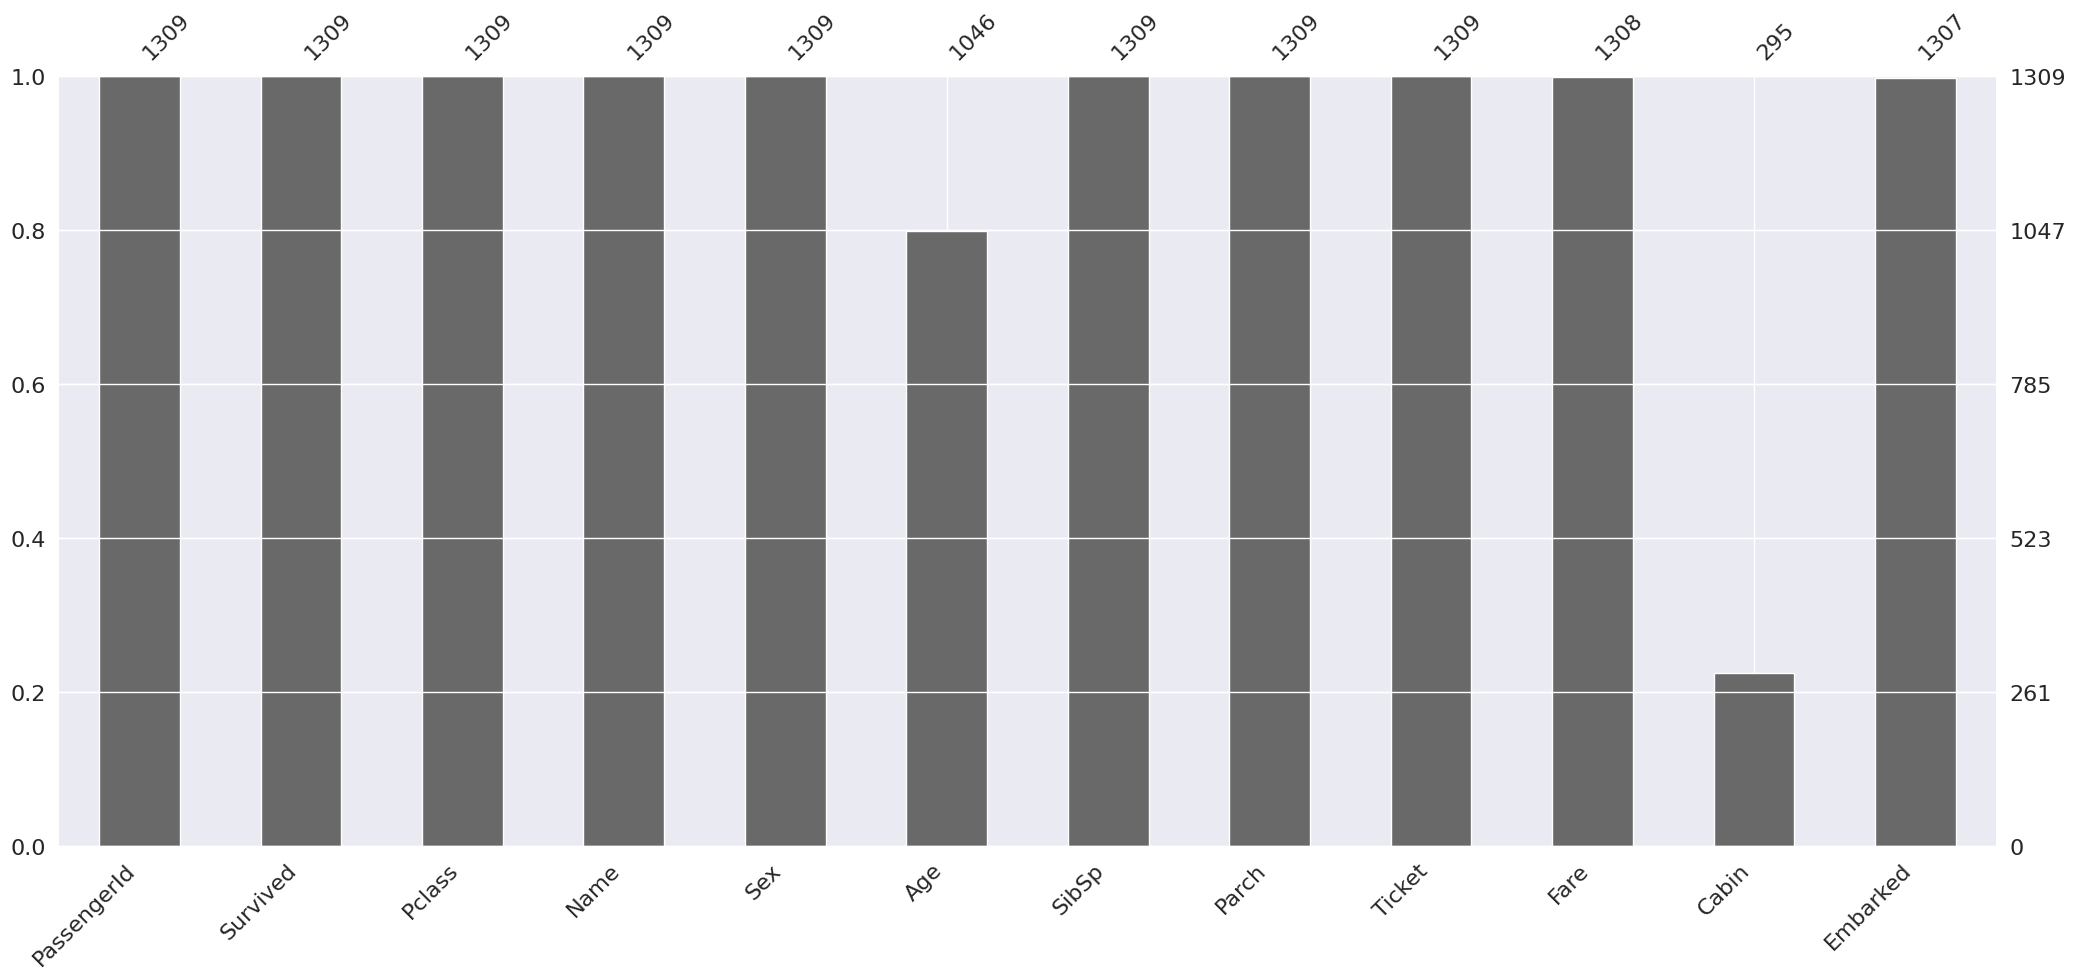

In [51]:
# Detect missing values
# Visualisation
import missingno as msno
msno.bar(df)

#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [52]:
# dropping cabin
df_copy=df
df_copy.pop('Cabin')
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
#finding mode value for Fare
mode_val=df_copy['Fare'].mode()[0]

#replacing null with mode value
df_copy['Fare'] = df_copy['Fare'].fillna(mode_val)



In [54]:
#finding mode value for Emberked
mode_val1= df_copy['Embarked'].mode()[0]

In [55]:
mode_val1

'S'

In [56]:
# Fill missing values in 'Embarked' with the mode
df_copy['Embarked'] = df_copy['Embarked'].fillna(mode_val1)

In [57]:
df_copy.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
#finding median value for Age

med_val = df_copy['Age'].median()

#replacing null with median value
df_copy['Age'] = df_copy['Age'].fillna(med_val)
df_copy.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [59]:
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.503186,0.498854,0.385027,33.276193
std,378.020061,0.484918,0.837836,12.905241,1.041658,0.865560,51.743584
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: >

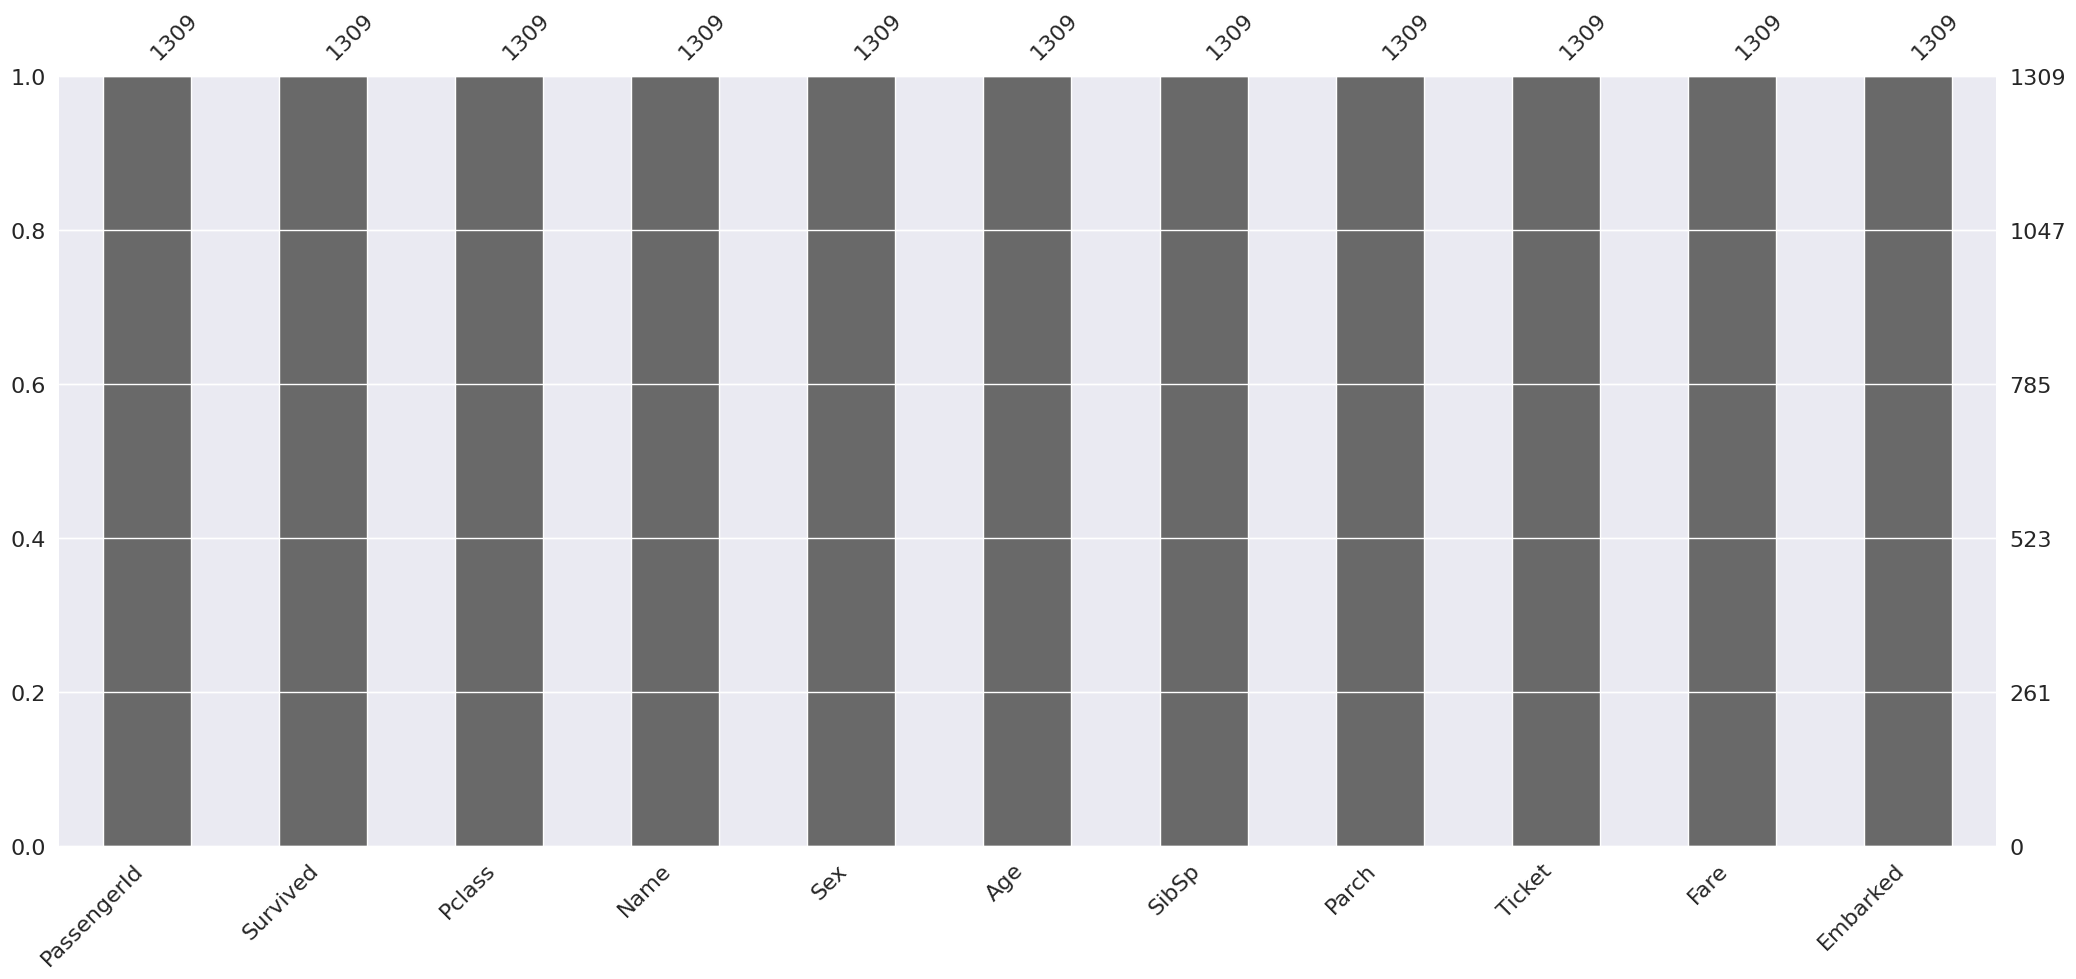

In [60]:
# Detect missing values

# Visualisation

import missingno as msno
msno.bar(df_copy)

 ##### Discuss your findings

**Information about missing values and Dataset:**

At first we checked for the missing values. in the visualising missing values part, we ploted a barchart using 'missingno' where x axis contained the features. from the grapgh we can see that there are some missing values present in the dataset. from the identifying missing values, we counted how many missing values in every feature of our dataset. for example, there are 263 missing values in 'Sex' feature, 1 in 'Fare', 2 in 'Embarked' and 1014 in 'Cabin'.  We have 1309 rows and 12 columns.

**Why we droped some column:**

So we can see that there is a huge number of missing values in feature 'Cabin'. For our model we dont need the cabin anyway, so we can drop the feature, and thats why, we dropped the feature.

**Fixing values in other columns:**

**Fixing Age:**

We checked for the outlier in this feature, and found some. Since mean is highly affected by outliers, we moved to median and filled up the null values using median values, which is not affected by the outliers.

**Fixing Embarked and Fare:**

For Embarked and Fare column, we replaced the null values with mode values from the column. Since both of the features has only 1 and 2 values missing, it doesnot affect the overall dataset.

#### 2.3.1 Visualization of column correlation. Also, plot Heat Map

In [61]:
df_c = df_copy.copy()

In [62]:
# Mapping 'male' to 0 and 'female' to 1
df_c['Sex'] = df_c['Sex'].map({'male': 0, 'female': 1})

In [63]:
# Mapping 'S', 'Q', and 'C' to unique values (e.g., 'S' -> 0, 'Q' -> 1, 'C' -> 2) for the 'Embarked' column
df_c['Embarked'] = df_c['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

In [64]:
df_c.drop(columns=['Name','Ticket'],inplace=True)

In [65]:
# Correlation table
correlation = df_c.corr()
correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.020370,-0.038354,-0.013406,0.025799,-0.055224,0.008942,0.031029,0.051977
Survived,-0.020370,1.000000,-0.264710,0.688371,-0.043286,0.002370,0.108919,0.233837,0.135138
Pclass,-0.038354,-0.264710,1.000000,-0.124617,-0.377908,0.060832,0.018322,-0.558740,-0.185479
Sex,-0.013406,0.688371,-0.124617,1.000000,-0.053663,0.109609,0.213125,0.185744,0.097960
Age,0.025799,-0.043286,-0.377908,-0.053663,1.000000,-0.189972,-0.125851,0.177948,0.063424
SibSp,-0.055224,0.002370,0.060832,0.109609,-0.189972,1.000000,0.373587,0.160388,-0.065567
Parch,0.008942,0.108919,0.018322,0.213125,-0.125851,0.373587,1.000000,0.221668,-0.044772
Fare,0.031029,0.233837,-0.558740,0.185744,0.177948,0.160388,0.221668,1.000000,0.238181
Embarked,0.051977,0.135138,-0.185479,0.097960,0.063424,-0.065567,-0.044772,0.238181,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

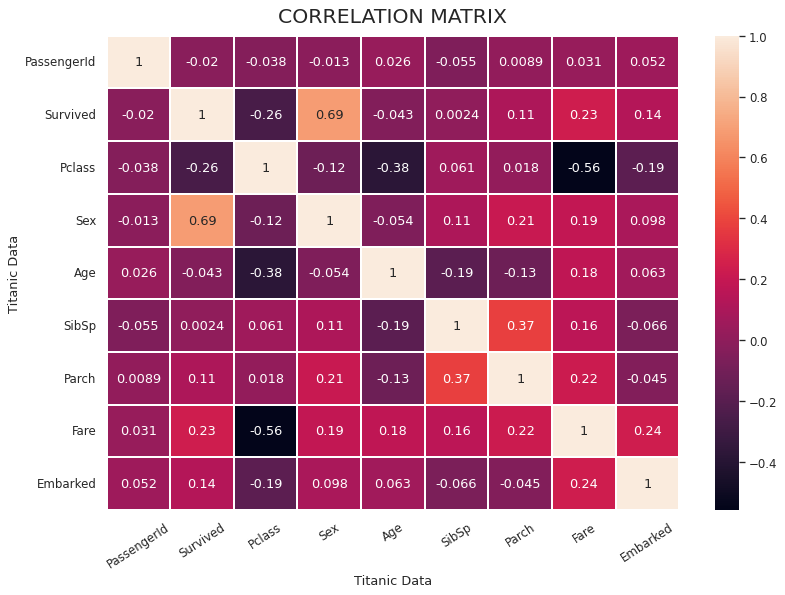

In [66]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

# **Visualization**

[843, 466]
Show


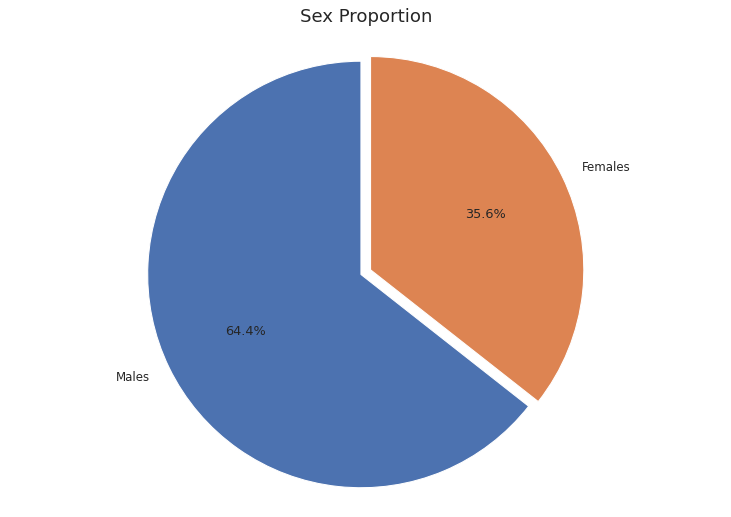

In [67]:
#pie chart

male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]
print(proportions)
print("Show")
plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()




In this section, we created a pie chart for the sex proportion for the passenger based on their sex. That is, how many of the passengers were male and how many of them are female. We created an pie chart for the based on their proporsion. If we consider total percentage of the passenger as 100%, from the graph, we can see that 64.4% of the passengers were male and 35.6% were female.

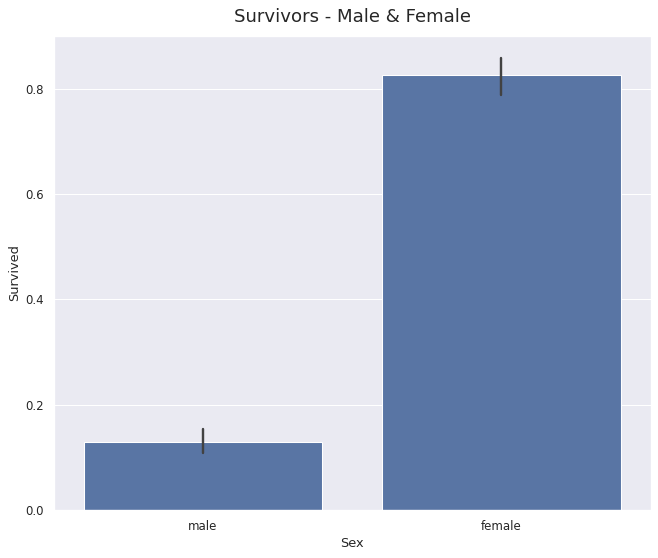

In [68]:
#barplot

plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

In this section we compaered male and female survival rate, by a bar chart. from the plot, we can clearly see that there were more, a huge number to be specific, of female survived the disaster. From a code we run later, where we checked the percentage for the survival rate based on sex. From the result we can see that about 82.62% percent female survived, and 12.93% of male survived. This makes sense, because when the accident took palce, the female and childrens were evacuated to safe first. So the survival of female should be grater then male.

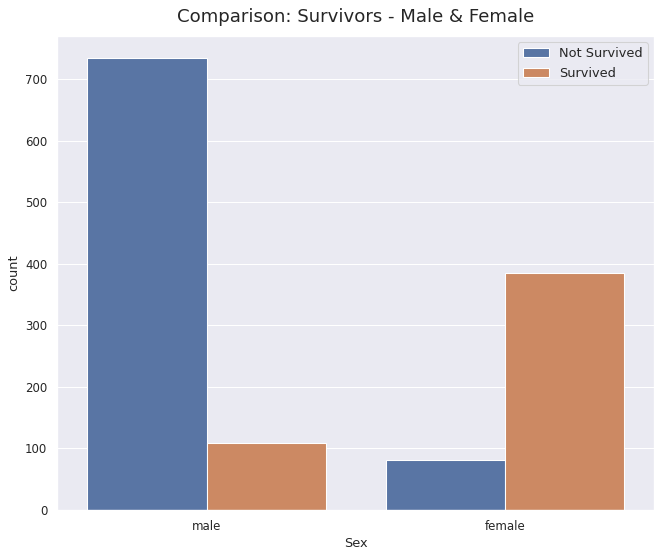

In [69]:
#countplot

plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

This is a comparison plot of male and female of whom survived and not. From the graph, we can see that, the number of male who did not survive is really high. A very small amount of men survived the accident. The number of the female surviors on the other hand is also high, since the number of male survivors is low. Similarly, the number of female who did not survive is small. Here both survived and not survived are shown for the both sex.

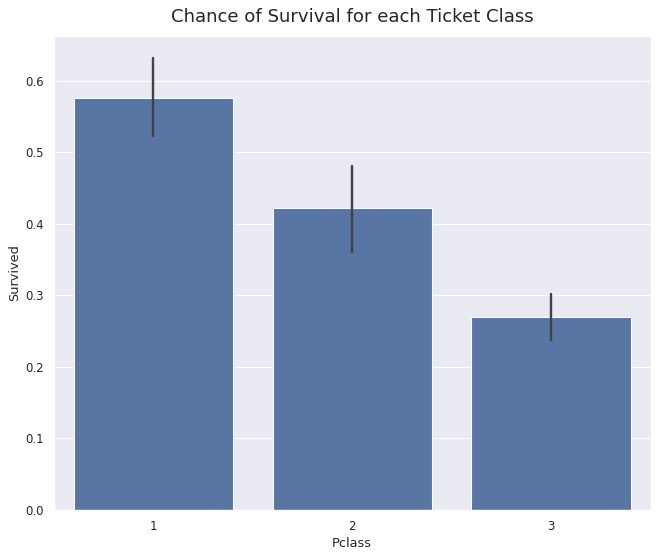

In [70]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

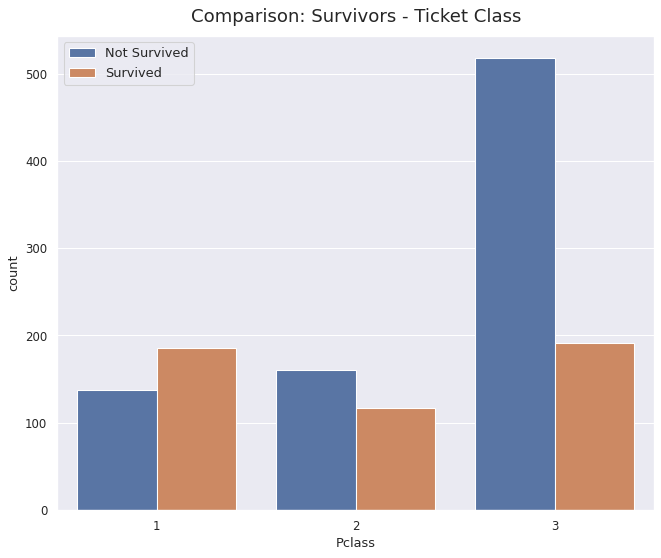

In [71]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

In this section, we took a look at if ticket class has anything to do with survival rate.
In our dataset there are three ticket class present. in the plot just above, there are 6 bar for indentify survived and not survived in each class.
From the plot we can clearly see that, both survived and not survived are high in class 3. But compare to others, most people from class 3 died. The less death rate is in class 1. Which makes sense beacuse, class 1 passengers get some extra previleges than ohter classes and at the same time, this pessengers get the most secure and comfortable spaces.

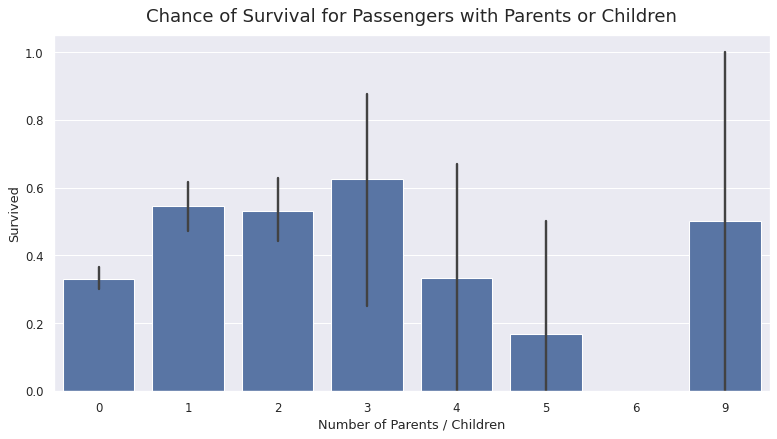

In [72]:
#  Chance of Survival for Passengers with Parents or Children
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

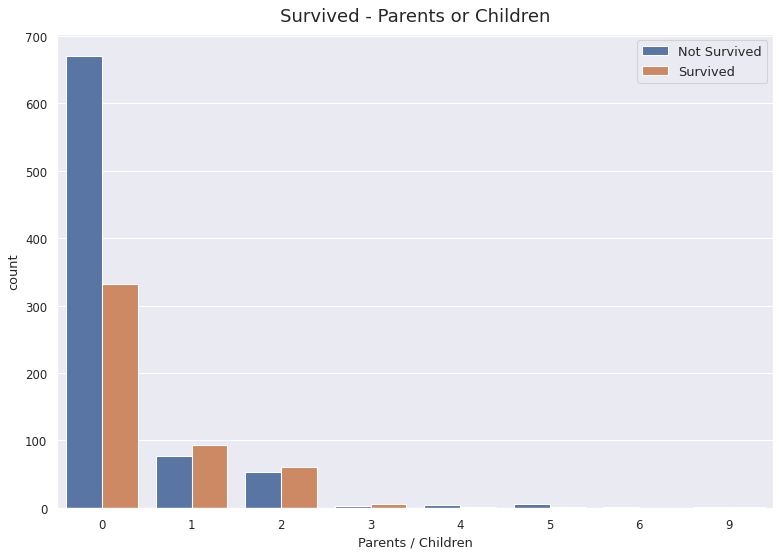

In [73]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

This section discusses about the relation of survival with passengers who were with their children or parents. In this plot we can find 8 classes, that is based on number of parents or children they/he/she was travelling with. From the plot it is clear that, most of the people who were travelling without their parent or chilren, survived. This is also true for the opposite as well. Most of the people who died also falls into the same category. The chances of surviving says quite opposite. From the plot of chances of surviving, we can see that those who were travelling alone doesnot had as much chance of surviving as they survived, that is the chances were quite low.

Those who had 1 parent/children survived quite moderatly, they are in between the line of surviving much or less. For this category though, the survival rate is quite high, comparing with the rate of not surviving. The probability graph also agrees with it. The chances of survival of these people indeed were high.

kinda same goes for the other categories as well. Category 6 and 9 has only 2 values, so it is difficult say something about them, as donot have much data that falls into this category.

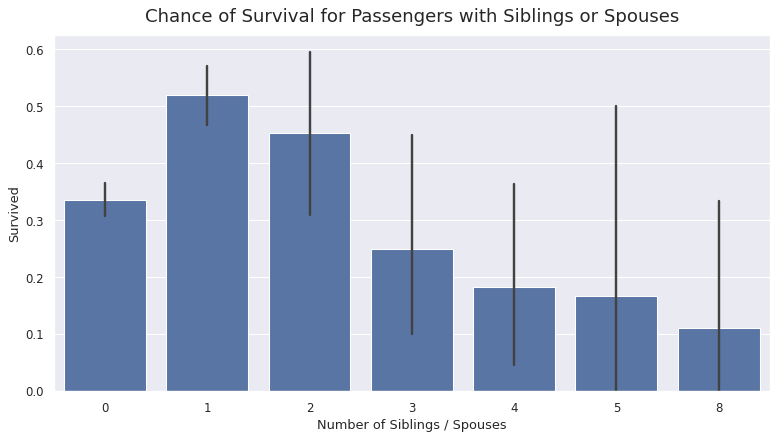

In [74]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

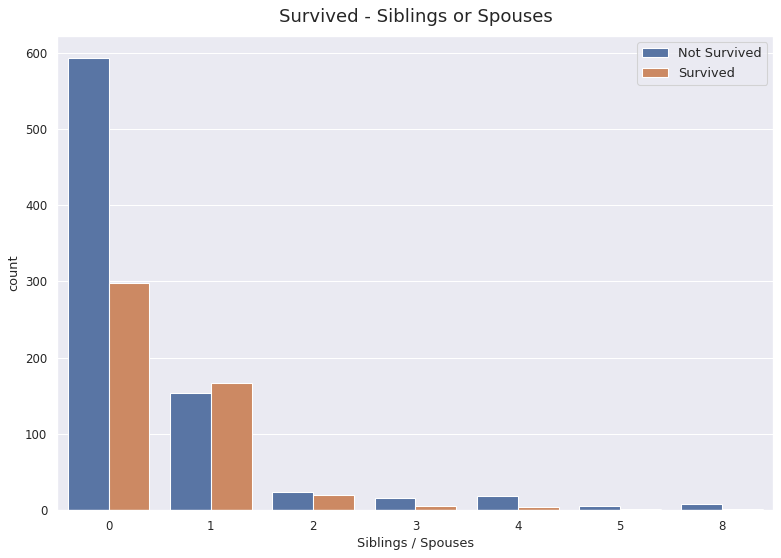

In [75]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

Here we tried to find the relation between the survival rate of those, including with survival chance, who were tavelling with siblings/spouse. From the plot of the chance of survival, we can see that those who were travelling with 1 sibling/spouse had a high rate of survival chance. In the actual survival graph though, we can see that the survival rate is not as much high as people travelling alone, i.e, having 0 sibling/spouse.
Those who had 0 sibling/spouse survived more then those who died in the same category. On the other hand, in the actual survival graph, those who travelled alone holds the highest number of survival and not survival people. The chance for this category though, from the chance graph, wrere moderatly low.

The lowest chance of survival was for them who had 8 siblings/spouse. From the actual graph though, we can see no body from that category survived the accident.

Those who had 2 sibling/spouse had a moderate chace of survival. From the actual survival graph, we can see that, the not survival rate is higher than the survival rate.

The cahnce graph fell gradually for the next 3 category, those who had 3,4,5 sibling/spouse. The actual survival graph is also kinda looks same fr these categories, low survival rate for 3 and 4 sibling/spouse, no survival for 5 sibling/spouse.